# Stock Financial Ratios Exploratory Data Analysis (EDA)

`Author: Gabriel Ziegler. Data Scientist and Machine Learning Engineer.`

This notebook is intended for those who want to learn more about financial ratios or more about Python and exploratory data analysis (or both).

Inspired in [Get Up-to-Date Financial Ratios of Stocks Using Python](https://towardsdatascience.com/get-up-to-date-financial-ratios-p-e-p-b-and-more-of-stocks-using-python-4b53dd82908f)

In [106]:
import pandas as pd
import requests
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

# To extract fundamental data
from bs4 import BeautifulSoup as bs
from plotly.offline import init_notebook_mode, iplot

# Templates and defaults
matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)
plt.style.use('ggplot')
sns.set_context("notebook")
pio.templates.default = "ggplot2"
pd.set_option('plotting.backend', 'plotly')
init_notebook_mode(connected=True) # initiate notebook for offline plot

# Functions to get and parse data from [FinViz](https://finviz.com/)

* if you get a `401 Unauthorized` error from the page, you'll need to improve your headers

In [88]:
# Needed so we won't get a 401 Unauthorized error. 
# This may need to be changed overtime as the website increases its non-human interaction detection. Are you human?
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0"}
url_prefix = "http://finviz.com/quote.ashx?t="

def fundamental_metric(soup, metric):
    return soup.find(text=metric).find_next(class_='snapshot-td2').text

def get_fundamental_data(df):
    for symbol in df.index:
        try:
            url = (url_prefix + symbol.lower())
            soup = bs(requests.get(url, headers=headers).content)
            for m in df.columns:                
                df.loc[symbol,m] = fundamental_metric(soup,m)                
        except Exception as e:
            print (symbol, 'not found')
#     df = df.reset_index()
#     df = df.rename(columns={'index': 'Company'})

    return df

def fancy_plot_metric(df, metric, title):
    """
    Use plotly engine, but makes notebook a lot heavier in Mbs.
    """
    fig = px.bar(df, x=df.index, y=metric, color=metric,
           title=title)
    fig.show()
    
def plot_metric(df, metric):
    """
    Uses Seaborn to Bar plot around a given metric
    """
    df = df.reset_index()
    # Remove NaN companies     
    df = df.dropna(subset=[metric])
    sns.barplot(x=df["index"], y=df[metric], data=df, palette="Blues_d")
    plt.show()
    
def plot_correlation(corr, classes, normalized=True, cmap='bone'):
    norm_corr = corr
    if normalized:
        norm_corr = corr.astype('float') / corr.sum(axis=1)[:, np.newaxis]

    sns.heatmap(norm_corr, annot=corr, fmt='.0%', xticklabels=classes, yticklabels=classes, cmap=cmap)

# Stocks list

We're going to look into some of the biggest companies in the `tech` and `financial` US industries.

In [89]:
tech_stocks = ['AAPL','AMZN','GOOG','FB','MSFT', 'NFLX', 'IBM', 'INTC', 'NVDA', 'CSCO', 'V', 'MA']
financial_stocks = ['BRK-A', 'JPM', 'BAC', 'C', 'MS', 'WFC', 'GS', 'AXP', 'BLK', 'USB', 'CME', 'TFC']
print(len(tech_stocks), len(financial_stocks))
stock_list = tech_stocks + financial_stocks

12 12


# Metrics list

Note that these metrics should be used to compare **companies throughout the same industry**.

We'll look closer at two different markets to see how they differ in some metrics. 

## Reference

[1] [Investopedia: 5 Must Have Metrics](https://www.investopedia.com/articles/fundamental-analysis/09/five-must-have-metrics-value-investors.asp)

In [108]:
metric = [
    'P/B',
    'P/E',
    'Forward P/E',
    'PEG',
    'Debt/Eq',
    'EPS (ttm)',
    'Dividend %',
    'ROE',
    'ROI',
    'EPS Q/Q',
    'Insider Own',
    'Price'
]

# Add indicators to DataFrame

In [109]:
raw_df = pd.DataFrame(index=stock_list, columns=metric)
raw_df = get_fundamental_data(raw_df)
raw_df

,P/B,P/E,Forward P/E,PEG,Debt/Eq,EPS (ttm),Dividend %,ROE,ROI,EPS Q/Q,Insider Own,Price
AAPL,28.05,35.73,30.33,2.84,1.57,3.29,0.70%,70.70%,26.90%,18.40%,0.07%,117.56
AMZN,21.82,123.66,72.49,3.43,0.69,26.02,-,20.50%,11.70%,97.40%,10.90%,3201.00
GOOG,5.11,34.20,27.57,7.11,-,45.49,-,-,-,-30.00%,5.75%,1605.67
FB,6.90,34.14,26.27,1.68,0.00,7.84,-,22.90%,17.40%,97.70%,0.66%,281.27
MSFT,13.76,37.24,29.30,2.49,0.62,5.76,1.04%,39.50%,23.10%,-14.10%,0.10%,216.42
NFLX,24.80,93.08,59.48,2.46,1.69,5.65,-,33.30%,10.20%,165.10%,1.62%,491.72
IBM,5.08,13.08,9.63,4.59,3.15,8.97,5.56%,39.70%,11.40%,-46.10%,0.10%,115.76
INTC,2.77,9.83,11.34,1.14,0.47,5.44,2.47%,30.50%,17.80%,29.00%,0.05%,53.97
NVDA,24.16,100.08,49.24,5.74,0.00,5.45,0.12%,26.90%,18.80%,10.90%,0.30%,543.64
CSCO,4.37,14.87,11.80,2.41,0.38,2.64,3.67%,31.20%,20.70%,-11.80%,0.10%,39.31


# Preprocess numerical information

In [115]:
df = raw_df.copy()
df['Dividend %'] = df['Dividend %'].str.replace('%', '')
df['ROE'] = df['ROE'].str.replace('%', '')
df['ROI'] = df['ROI'].str.replace('%', '')
df['EPS Q/Q'] = df['EPS Q/Q'].str.replace('%', '')
df['Insider Own'] = df['Insider Own'].str.replace('%', '')
df = df.apply(pd.to_numeric, errors='coerce')
df.head()

,P/B,P/E,Forward P/E,PEG,Debt/Eq,EPS (ttm),Dividend %,ROE,ROI,EPS Q/Q,Insider Own,Price
AAPL,28.05,35.73,30.33,2.84,1.57,3.29,0.70,70.7,26.9,18.4,0.07,117.56
AMZN,21.82,123.66,72.49,3.43,0.69,26.02,NaN,20.5,11.7,97.4,10.90,3201.00
GOOG,5.11,34.20,27.57,7.11,NaN,45.49,NaN,NaN,NaN,-30.0,5.75,1605.67
FB,6.90,34.14,26.27,1.68,0.00,7.84,NaN,22.9,17.4,97.7,0.66,281.27
MSFT,13.76,37.24,29.30,2.49,0.62,5.76,1.04,39.5,23.1,-14.1,0.10,216.42


# Feature Engineering

Some features extracted are best interpreted if we tweak them a little bit.
For instance, Berkshire Hathaway's Earnings-per-share (EPS) is extremely unbalanced compared to other finacial companies.
So instead of using the raw EPS value, we'll create a new metric called *earnings-per-hundred-dollars-worth-of-share* (EPS ($100)).  

## Reference

[1] [Money StackExchange - Why is BRK.A's EPS (ttm) so high?](https://money.stackexchange.com/questions/132139/why-is-brk-as-eps-ttm-so-high/132141#132141)

In [120]:
df["EPS (ttm per $100)"] = df["EPS (ttm)"] / df["Price"] * 100
df.head()

,P/B,P/E,Forward P/E,PEG,Debt/Eq,EPS (ttm),Dividend %,ROE,ROI,EPS Q/Q,Insider Own,Price,EPS (ttm per $100)
AAPL,28.05,35.73,30.33,2.84,1.57,3.29,0.70,70.7,26.9,18.4,0.07,117.56,2.798571
AMZN,21.82,123.66,72.49,3.43,0.69,26.02,NaN,20.5,11.7,97.4,10.90,3201.00,0.812871
GOOG,5.11,34.20,27.57,7.11,NaN,45.49,NaN,NaN,NaN,-30.0,5.75,1605.67,2.833085
FB,6.90,34.14,26.27,1.68,0.00,7.84,NaN,22.9,17.4,97.7,0.66,281.27,2.787357
MSFT,13.76,37.24,29.30,2.49,0.62,5.76,1.04,39.5,23.1,-14.1,0.10,216.42,2.661492


# Features to analyse

We'll select a subset of features to plot and analyse to avoid having outliers ruining the graph quality.

In [133]:
wanted_feats = [
    'P/B', 'P/E', 'Forward P/E', 'PEG', 'Debt/Eq',
    'Dividend %', 'ROE', 'ROI', 'Insider Own',
    'EPS (ttm per $100)'
]

# Split into two different dataframes for easier manipulation

In [134]:
fin_df = df[df.index.isin(financial_stocks)][wanted_feats]
tech_df = df[df.index.isin(tech_stocks)][wanted_feats]

# Boxplot

![](https://miro.medium.com/max/700/1*NRlqiZGQdsIyAu0KzP7LaQ.png)

The boxplot gives us a lot of information.

It tells us about the **quartiles, outliers, median, minimum, maximum**.

# Tech Stocks Boxplot

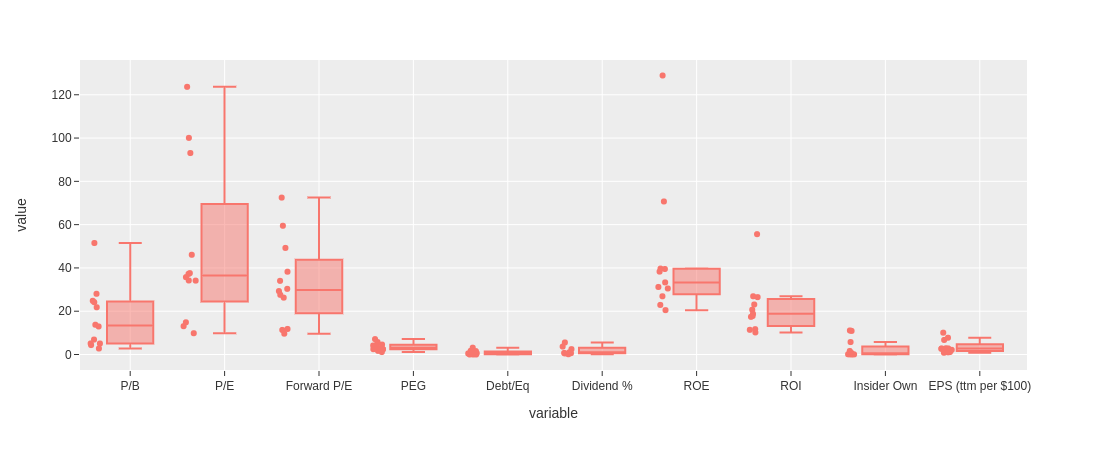

In [135]:
px.box(tech_df, points='all')

# Financial Stocks Boxplot

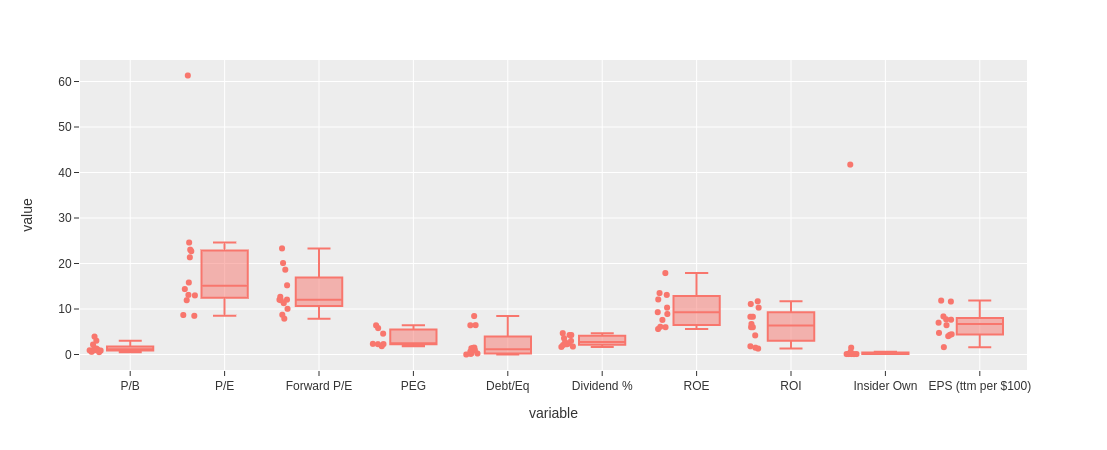

In [137]:
px.box(fin_df, points='all')

# P/B: Price to Book Ratio

The price-to-book ratio or P/B ratio measures whether a stock is over or undervalued by comparing the net value (assets - liabilities) of a company to its market capitalization.    
The reason the ratio is important to value investors is that it shows the difference between the market value of a company's stock and its book value.   
A P/B ratio of 1 means the underlying stock is trading at nearly book value. 

* Values higher than 1 could mean the company is being overselled.
* Values below 1 oftentimes mean a company is trading under its stated book value, which could mean an opportunity

Note how P/B metrics varies largely between different industries. The tech industry would seem extremelly overvalued if compared to the financial industry. But is it? 

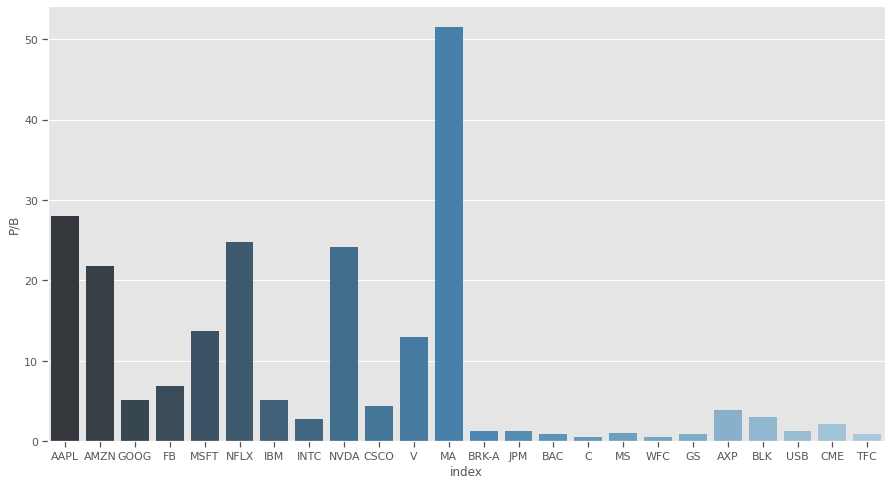

In [8]:
plot_metric(df, 'P/B')

# Price to Book Earnings

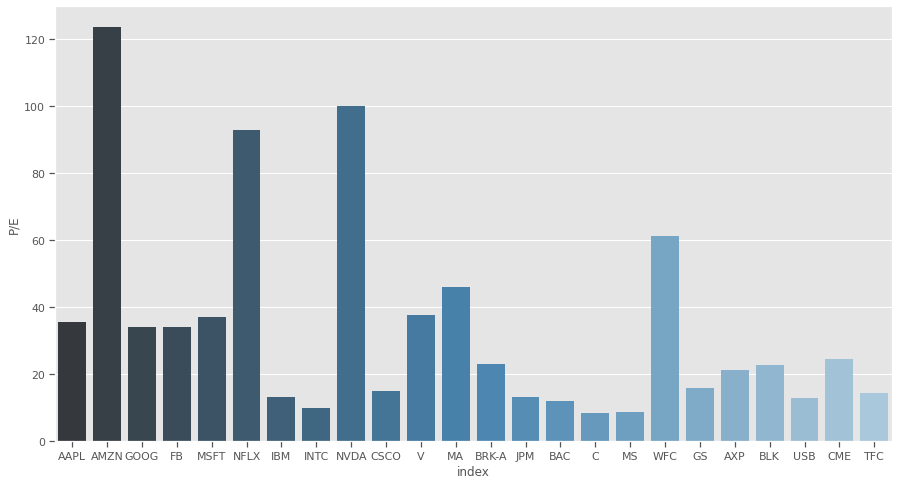

In [9]:
plot_metric(df, 'P/E')

# Price to Earnings-to-Growth Ratio

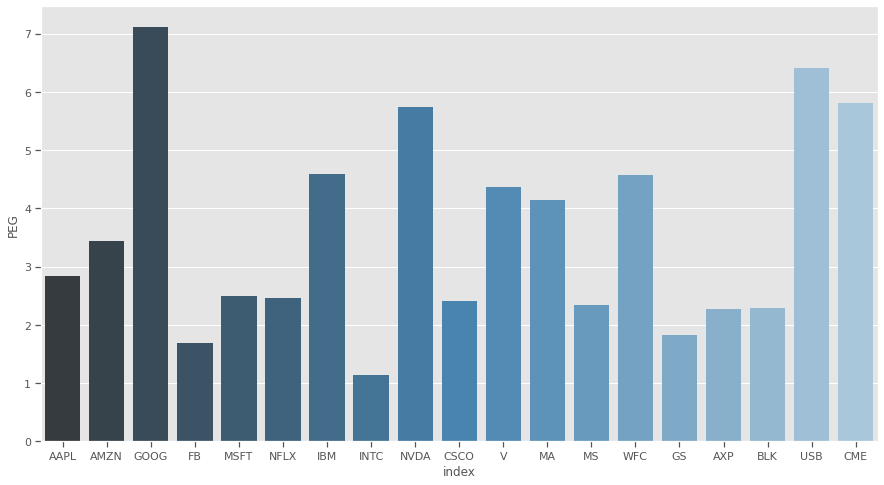

In [10]:
plot_metric(df, 'PEG')

# Forward Price-to-Earnings Ratio

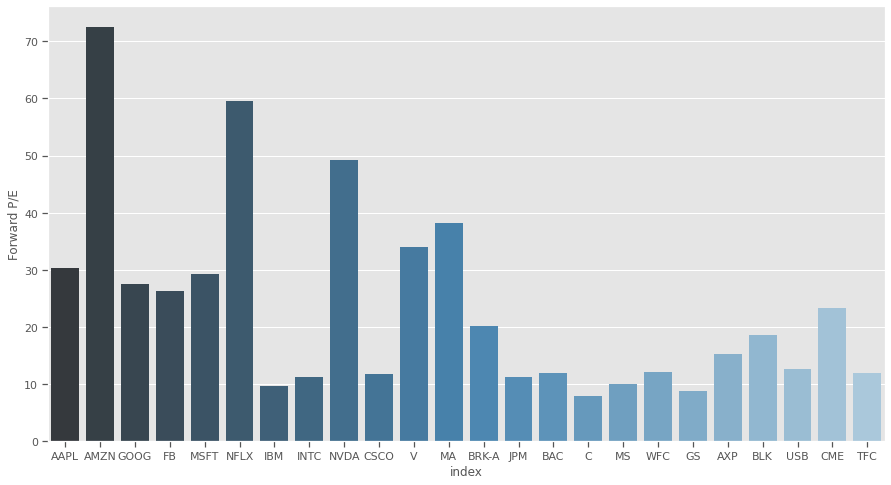

In [11]:
plot_metric(df, 'Forward P/E')

# Debt-To-Equity Ratio

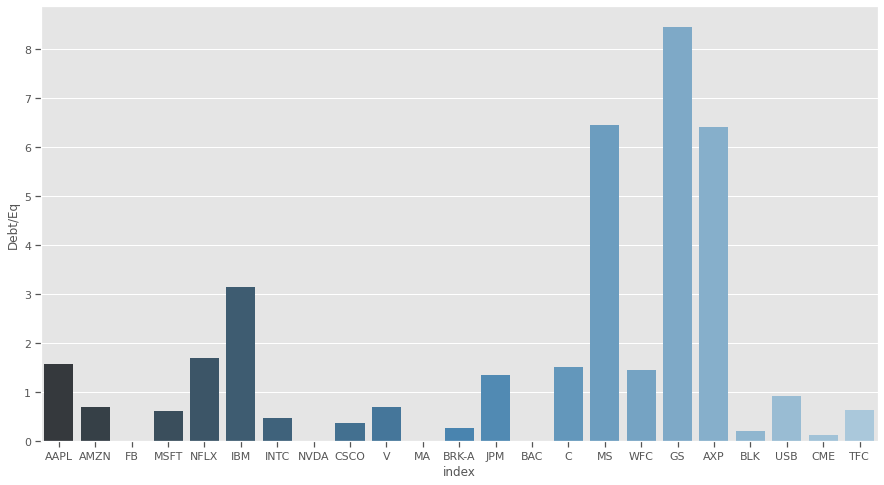

In [12]:
plot_metric(df, 'Debt/Eq')

# Return on Equity

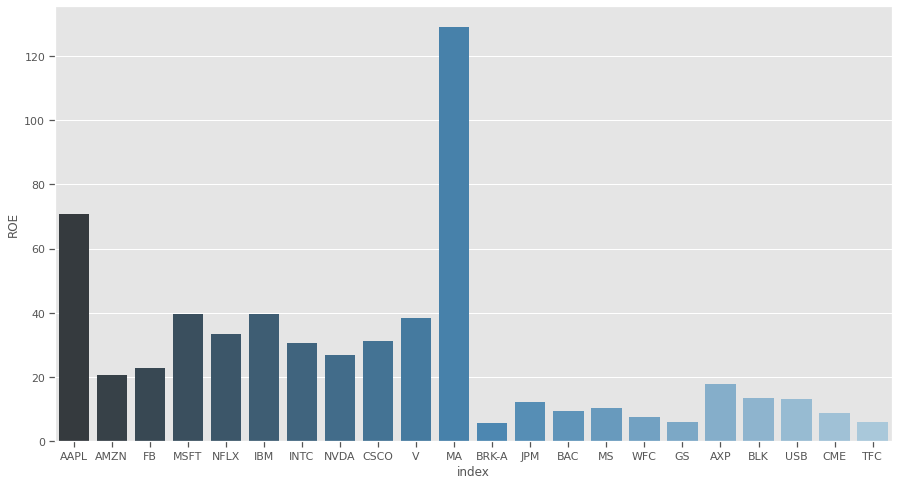

In [13]:
plot_metric(df, 'ROE')

# Return on Investment

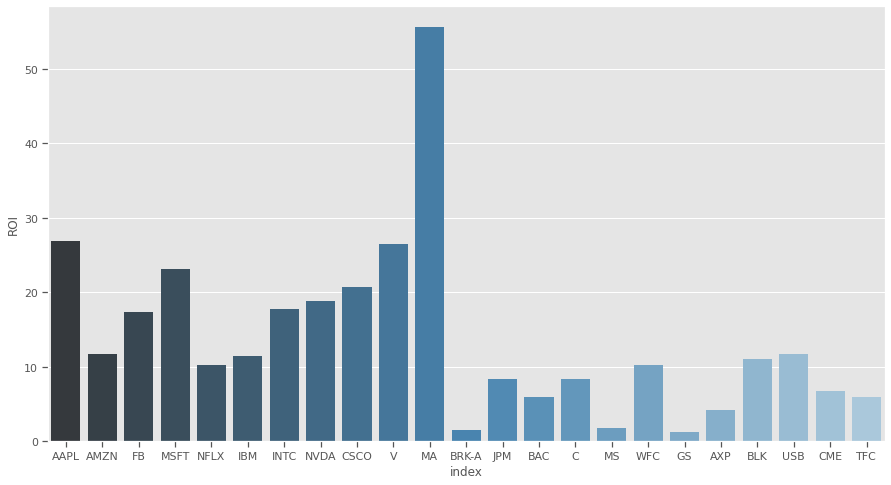

In [14]:
plot_metric(df, 'ROI')

# Insider Ownership

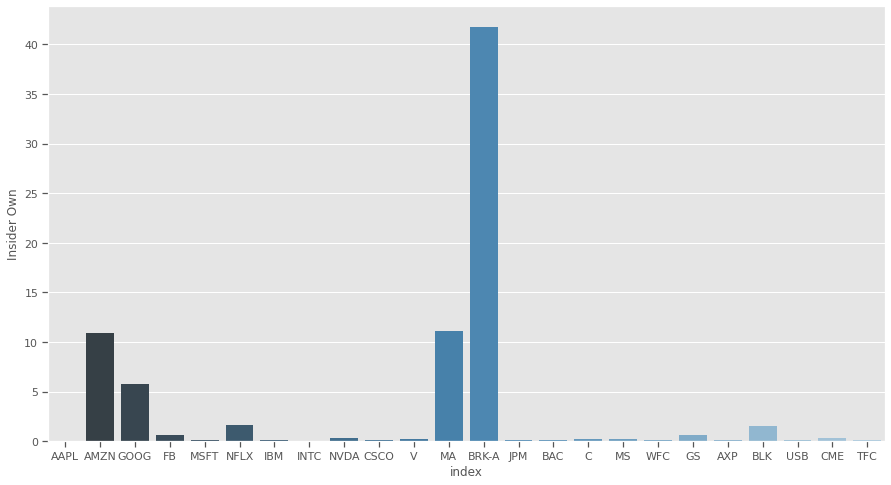

In [15]:
plot_metric(df, 'Insider Own')

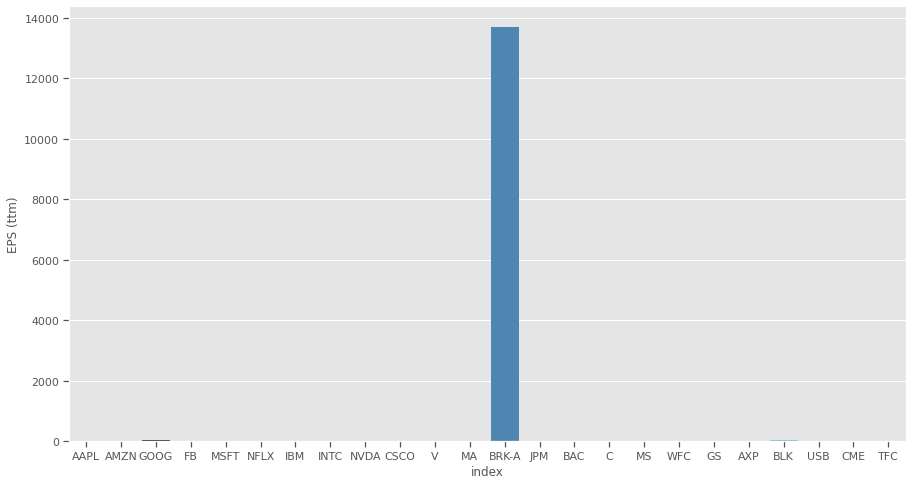

In [53]:
plot_metric(df, 'EPS (ttm)')

In [54]:
fin_df

,P/B,P/E,Forward P/E,PEG,Debt/Eq,EPS (ttm),Dividend %,ROE,ROI,EPS Q/Q,Insider Own
BRK-A,1.29,23.04,20.10,NaN,0.27,13690.62,NaN,5.6,1.5,89.5,41.74
JPM,1.32,13.10,11.29,NaN,1.35,7.66,3.59,12.1,8.3,-50.9,0.10
BAC,0.87,11.93,11.92,NaN,0.00,2.02,2.98,9.3,6.0,-49.6,0.10
C,0.52,8.50,7.88,NaN,1.51,5.12,4.69,NaN,8.3,-87.1,0.25
MS,1.02,8.68,10.04,2.34,6.45,5.93,2.72,10.3,1.8,59.5,0.20
WFC,0.59,61.32,12.06,4.58,1.46,0.37,1.75,7.6,10.3,-150.4,0.13
GS,0.94,15.82,8.74,1.83,8.45,13.15,2.40,6.0,1.3,-90.5,0.60
AXP,3.94,21.36,15.21,2.27,6.42,4.83,1.67,17.9,4.2,-85.7,0.10
BLK,3.03,22.71,18.64,2.29,0.22,28.40,2.25,13.5,11.1,22.3,1.50
USB,1.29,12.99,12.68,6.41,0.93,3.02,4.28,13.1,11.7,-62.7,0.09


# Correlation Matrix

Clearly from the graphs above we can see that some metrics are very correlated with each other.

We'll use the Pearson correlation coeffiecient to see more clearly which metrics are positively or negatively correlated.

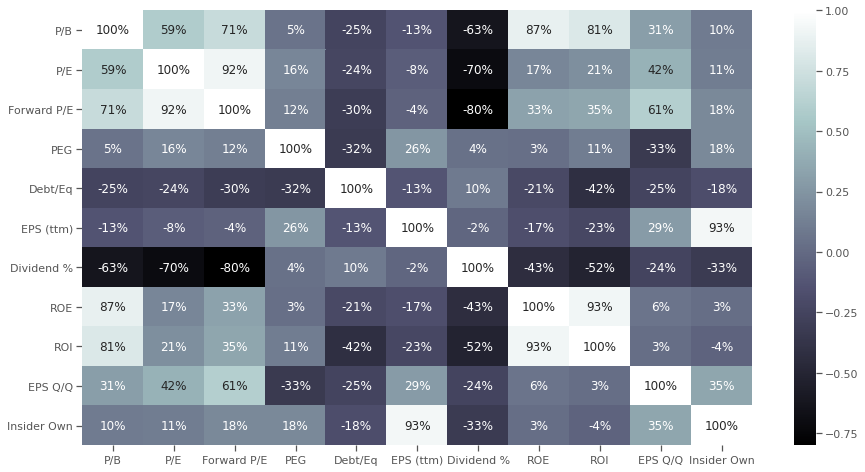

In [16]:
corr = df.corr()
plot_correlation(corr, corr.index, normalized=False)